https://wiki.cancerimagingarchive.net/display/Public/CBIS-DDSM

In [22]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pydicom
from pydicom import dcmread
import pandas as pd
from os.path import exists
from PIL import Image, ImageOps
import plotly.express as px
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt

ROOT_PATH = "/Documents/science_project"

MASS_TRAIN_BASE = os.path.join(ROOT_PATH,'train/mass_training_full_mamogram/manifest-Egq0PU078220738724328010106/CBIS-DDSM')
MASS_TEST_BASE = os.path.join(ROOT_PATH,'test/pass_test_full_mammogram/manifest-KlyiOp8o8257600061251652132/CBIS-DDSM')

MASS_ROI_TRAIN_BASE = os.path.join(ROOT_PATH,'train/mass_training_roi/manifest-LyDgOQGl3853937313152078328/CBIS-DDSM')
MASS_ROI_TEST_BASE = os.path.join(ROOT_PATH,'test/mass_roi_test/manifest-OlX3eVq41551709337535597984/CBIS-DDSM')


CALC_TRAIN_BASE = os.path.join(ROOT_PATH,'train/calc_training_mammogram/manifest-ujvjeoX91618930289175451743/CBIS-DDSM')
CALC_TEST_BASE = os.path.join(ROOT_PATH,'test/calc_full_mammogram/manifest-Lc2gU11L5187302126735146038/CBIS-DDSM')

CALC_ROI_TRAIN_BASE = os.path.join(ROOT_PATH,'train/calc_training_roi_crop/manifest-SFgGWyWU652685503970928670/CBIS-DDSM')
CALC_ROI_TEST_BASE = os.path.join(ROOT_PATH,'test/calc_roi_test/manifest-JnaTC0xa8206077746049065924/CBIS-DDSM')


WRITE_MASS_TRAIN =os.path.join(ROOT_PATH,'preprossed/mass/train')
WRITE_MASS_TEST =os.path.join(ROOT_PATH,'preprossed/mass/test')

WRITE_MASS_ROI_TRAIN =os.path.join(ROOT_PATH,'preprossed/mass_roi/train')
WRITE_MASS_ROI_TEST =os.path.join(ROOT_PATH,'preprossed/mass_roi/test')

WRITE_CALC_TRAIN =os.path.join(ROOT_PATH,'preprossed/calc/train')
WRITE_CALC_TEST =os.path.join(ROOT_PATH,'preprossed/calc/test')

WRITE_CALC_ROI_TRAIN =os.path.join(ROOT_PATH,'preprossed/calc_roi/train')
WRITE_CALC_ROI_TEST =os.path.join(ROOT_PATH,'preprossed/calc_roi/test')


#IMAGE_SIZE = (300,510)
#IMAGE_SIZE = (100,100)

data_config_dict = {
    'calc': {
        'train_base_path' : CALC_TRAIN_BASE,
        'test_base_path'  : CALC_TEST_BASE,
        'train_write_path': WRITE_CALC_TRAIN,
        'test_write_path' : WRITE_CALC_TEST,
        'image_path'      : 'image file path',
        'image_size'      : (100,170)
    },
    'calc_roi': {
        'train_base_path' : CALC_ROI_TRAIN_BASE,
        'test_base_path'  : CALC_ROI_TEST_BASE,
        'train_write_path': WRITE_CALC_ROI_TRAIN,
        'test_write_path' : WRITE_CALC_ROI_TEST,
        'image_path'      : 'ROI mask file path',
        'image_size'      : (224,224)
        #'image_size'      : (100,100)
    },
    'mass': {
        'train_base_path' : MASS_TRAIN_BASE,
        'test_base_path'  : MASS_TEST_BASE,
        'train_write_path': WRITE_MASS_TRAIN,
        'test_write_path' : WRITE_MASS_TEST,
        'image_path'      : 'image file path',
        'image_size'      : (100,170)
    },
   'mass_roi': {
        'train_base_path' : MASS_ROI_TRAIN_BASE,
        'test_base_path'  : MASS_ROI_TEST_BASE,
        'train_write_path': WRITE_MASS_ROI_TRAIN,
        'test_write_path' : WRITE_MASS_ROI_TEST,
        'image_path'      : 'ROI mask file path',
        #'image_size'      : (224,224)
        'image_size'      : (100,100)
    }
}

DATA_SET = 'mass_roi'


In [23]:
mass_train = pd.read_csv(os.path.join(ROOT_PATH, 'train/mass_case_description_train_set.csv'))
mass_test  = pd.read_csv(os.path.join(ROOT_PATH, 'test/mass_case_description_test_set.csv'))

calc_train = pd.read_csv(os.path.join(ROOT_PATH, 'train/calc_case_description_train_set.csv'))
calc_test = pd.read_csv(os.path.join(ROOT_PATH, 'test/calc_case_description_test_set.csv'))

if DATA_SET == 'calc_roi' or DATA_SET == 'calc':
    train_data = calc_train
    test_data =  calc_test
else:
    train_data = mass_train
    test_data =  mass_test
    
IMAGE_SIZE = data_config_dict[DATA_SET]['image_size']

In [24]:
IMAGE_SIZE

(100, 100)

In [25]:
train_data.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [73]:
print(train_data.shape)
train_data.columns

(1318, 14)


Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')

In [74]:
train_data.groupby('pathology').size()

pathology
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
MALIGNANT                  637
dtype: int64

In [75]:
test_data.groupby('pathology').size()

pathology
BENIGN                     194
BENIGN_WITHOUT_CALLBACK     37
MALIGNANT                  147
dtype: int64

In [26]:
def resize_with_padding(img, expected_size):
    img.thumbnail((expected_size[0], expected_size[1]))
    # print(img.size)
    delta_width = expected_size[0] - img.size[0]
    delta_height = expected_size[1] - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding)

def convert_dcm_jpg(im):    
    im = im.pixel_array.astype(float)
    rescaled_image = (np.maximum(im,0)/im.max())*255 # float pixels
    final_image = np.uint8(rescaled_image) # integers pixels
    final_image = Image.fromarray(final_image)
    return final_image

def get_image(img_path):
    s = img_path.split('/')[:-1]
    image_dir = '/'.join(s)
    s.append('1-1.dcm')
    image_file = '/'.join(s)

    ds = dcmread(image_file)
    return ds


def preprocess_image(data_frame,input_base_path,output_base_path,image_field):

    n = data_frame.shape[0]
    print('total records : ',n)
    for i in range(n):
        if i%100 == 0:
            print('progress : ', i)
    
        row = data_frame.iloc[i]
        image_path = row[image_field]
        pathology  = row['pathology']
        dcm_image = get_image(os.path.join(input_base_path,image_path))  # get in DCM format

        dcm_image = get_image(os.path.join(input_base_path,image_path))  # get in DCM format
        jpg_image = convert_dcm_jpg(dcm_image)  # Convert to JPG

        padded_image = resize_with_padding(jpg_image, IMAGE_SIZE)  # Resize image
        rgb_image = padded_image.convert('RGB')
        #print(pathology)
        if pathology == 'MALIGNANT':
            class_dir = 'MALIGNANT'
        elif pathology == 'BENIGN':
            class_dir = 'BENIGN'
        elif pathology == 'BENIGN_WITHOUT_CALLBACK':
            class_dir = 'BENIGN'
        else:
            class_dir = 'OTHER'
        file_name  = ':'.join(image_path.split('/')[0:1]) + '.jpg'
        rgb_image.save(os.path.join(output_base_path,class_dir,file_name) )
        #display(rgb_image)


# Preprocessing the data

In [27]:
##  PReprocessing 
##
preprocess_image(train_data, 
                data_config_dict[DATA_SET]['train_base_path'],  
                data_config_dict[DATA_SET]['train_write_path'], 
                data_config_dict[DATA_SET]['image_path'])

preprocess_image(test_data, 
                data_config_dict[DATA_SET]['test_base_path'],  
                data_config_dict[DATA_SET]['test_write_path'], 
                data_config_dict[DATA_SET]['image_path'])



total records :  1318
progress :  0
progress :  100
progress :  200
progress :  300
progress :  400
progress :  500
progress :  600
progress :  700
progress :  800
progress :  900
progress :  1000
progress :  1100
progress :  1200
progress :  1300
total records :  378
progress :  0
progress :  100
progress :  200
progress :  300


In [28]:
import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam 
#from keras import backend as K

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2 as  PretrainedModel,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import ssl

# Create Dataset for the Training, Validation & Testing

In [50]:
batch_s = 64

train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    data_config_dict[DATA_SET]['train_write_path'],
    labels='inferred', 
    label_mode='categorical',
    class_names=None, 
    color_mode='rgb', 
    batch_size=batch_s, 
    image_size=(IMAGE_SIZE[1],IMAGE_SIZE[0]), 
    shuffle=True, 
    seed=123, 
    validation_split=0.2, 
    subset = "training",
    interpolation='nearest', 
    follow_links=False,
    crop_to_aspect_ratio=False
)

val_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    data_config_dict[DATA_SET]['train_write_path'],
    labels='inferred', 
    label_mode='categorical',
    class_names=None, 
    color_mode='rgb', 
    batch_size=batch_s, 
    image_size=(IMAGE_SIZE[1],IMAGE_SIZE[0]), 
    shuffle=True, 
    seed=123, 
    validation_split=0.2, 
    subset="validation",
    interpolation='nearest', 
    follow_links=False,
    crop_to_aspect_ratio=False
)

test_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    data_config_dict[DATA_SET]['test_write_path'],
    labels='inferred', 
    label_mode='categorical',
    class_names=None, 
    color_mode='rgb', 
    batch_size=batch_s, 
    image_size=(IMAGE_SIZE[1],IMAGE_SIZE[0]), 
    shuffle=True, 
    seed=123, 
    validation_split=None, 
    subset=None,
    interpolation='nearest', 
    follow_links=False,
    crop_to_aspect_ratio=False
)



Found 1318 files belonging to 2 classes.
Using 1055 files for training.
Found 1318 files belonging to 2 classes.
Using 263 files for validation.
Found 378 files belonging to 2 classes.


# Generate the images with augmentations

In [51]:
batch_size = 64

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
    #    featurewise_center=True,
    #    featurewise_std_normalization=True,
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        data_config_dict[DATA_SET]['train_write_path'],  # this is the target directory
        target_size=(IMAGE_SIZE[1],IMAGE_SIZE[0]),  # all images will be resized 
        batch_size=batch_size,
        #class_mode='categorical'
        class_mode='binary'
    )  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        data_config_dict[DATA_SET]['test_write_path'],
        target_size=(IMAGE_SIZE[1],IMAGE_SIZE[0]),
        batch_size=batch_size,
       # class_mode='categorical'
        class_mode='binary'
)


Found 1318 images belonging to 2 classes.
Found 378 images belonging to 2 classes.


In [30]:
IMAGE_SIZE

(100, 100)

In [52]:
train_ds.class_names

['BENIGN', 'MALIGNANT']

# Visualize the images

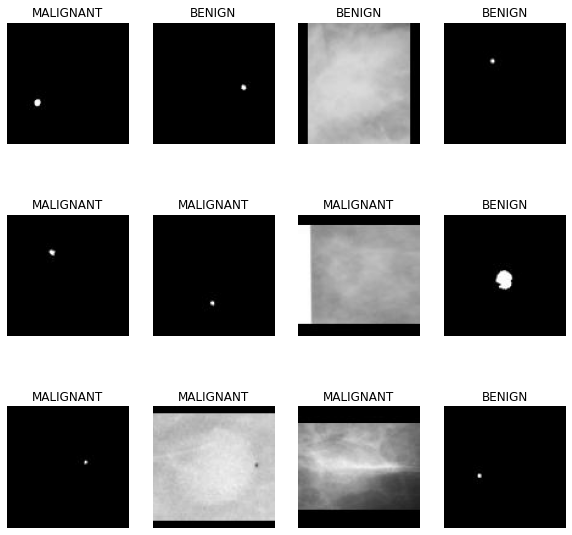

In [53]:
class_names = train_ds.class_names
#print(class_names)

image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(12):
  ax = plt.subplot(3, 4, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[int(label.numpy()[0])])
  plt.axis("off")


# Image Augmentation

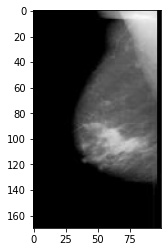

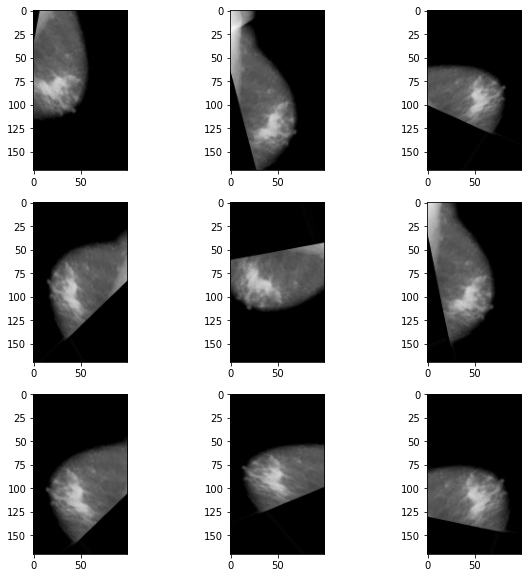

In [33]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

img = load_img(os.path.join(data_config_dict['calc']['train_write_path'], 'MALIGNANT/Calc-Training_P_02566_RIGHT_MLO.jpg'))

pyplot.imshow(img)
                              
data = img_to_array(img)

samples = expand_dims(data, 0)

datagen = ImageDataGenerator(rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

it = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    pyplot.subplot(3,3,i+1)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)

pyplot.show()



# InceptionResNetV2 : Build The Model 

In [42]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.applications import EfficientNetB0 as Net
from tensorflow.keras.layers import GlobalMaxPooling2D

ssl._create_default_https_context = ssl._create_unverified_context

# EfficientNetB0 -> needs 224x224 image
def create_model_en(input_shape, n_out):
    pretrain_model = Net(weights="imagenet", include_top=False, input_shape=input_shape)
    
    pretrain_model.trainable = False
    
    input_tensor = Input(shape=input_shape)
    
    bn = BatchNormalization()(input_tensor)
    x = pretrain_model(bn)
    x = GlobalMaxPooling2D()(x)    
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    output = Dense(1, activation='sigmoid')(x)
    model_es = Model(input_tensor, output)
    return model_es

# Inception Resnet v2
def create_model_irn(input_shape, n_out):
    
    pretrain_model = InceptionResNetV2(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape)    

    pretrain_model.trainable = False ## DO NOT TRAIN InceptionResNetV2 in FIRST ROUND
    
    input_tensor = Input(shape=input_shape)
    bn = BatchNormalization()(input_tensor)
    x = pretrain_model(bn)
    x = Conv2D(128, kernel_size=(1,1), activation='relu')(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)
#    output = Dense(2, activation='softmax')(x)
    model = Model(input_tensor, output)
    return model

#keras.backend.clear_session()

N_CLASS = 2

model = create_model_irn(
#model = create_model_en(    
    input_shape = (IMAGE_SIZE[1],IMAGE_SIZE[0],3), 
    n_out= N_CLASS)

model.summary()

metrics = [keras.metrics.TruePositives(name='tp'),
           keras.metrics.FalsePositives(name='fp'),
           keras.metrics.TrueNegatives(name='tn'),
           keras.metrics.FalseNegatives(name='fn'),
           keras.metrics.BinaryAccuracy(name='accuracy'),
           keras.metrics.AUC(name='auc')]

model.compile(
    loss='binary_crossentropy',  
    optimizer=Adam(1e-3),
#    metrics=['acc',tf.keras.metrics.AUC()]
    metrics = metrics
)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 batch_normalization_817 (Ba  (None, 100, 100, 3)      12        
 tchNormalization)                                               
                                                                 
 inception_resnet_v2 (Functi  (None, 1, 1, 1536)       54336736  
 onal)                                                           
                                                                 
 conv2d_815 (Conv2D)         (None, 1, 1, 128)         196736    
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dropout_8 (Dropout)         (None, 128)               0   

# Train the Model - keeping the Resnet freezed/unchanged



In [43]:
hist = model.fit(
        train_generator,
  #      steps_per_epoch = int(8000/batch_size), # batch_size,
        epochs=40,
        validation_data= validation_generator,
    #    validation_steps=int(2000/batch_size),
        verbose = 2,
        shuffle = True        
)


Epoch 1/40
21/21 - 65s - loss: 0.7764 - tp: 310.0000 - fp: 269.0000 - tn: 412.0000 - fn: 327.0000 - accuracy: 0.5478 - auc: 0.5502 - val_loss: 0.6962 - val_tp: 113.0000 - val_fp: 146.0000 - val_tn: 85.0000 - val_fn: 34.0000 - val_accuracy: 0.5238 - val_auc: 0.5934 - 65s/epoch - 3s/step
Epoch 2/40
21/21 - 51s - loss: 0.7358 - tp: 282.0000 - fp: 265.0000 - tn: 416.0000 - fn: 355.0000 - accuracy: 0.5296 - auc: 0.5141 - val_loss: 0.6898 - val_tp: 114.0000 - val_fp: 152.0000 - val_tn: 79.0000 - val_fn: 33.0000 - val_accuracy: 0.5106 - val_auc: 0.6217 - 51s/epoch - 2s/step
Epoch 3/40
21/21 - 53s - loss: 0.6930 - tp: 250.0000 - fp: 216.0000 - tn: 465.0000 - fn: 387.0000 - accuracy: 0.5425 - auc: 0.5481 - val_loss: 0.6703 - val_tp: 67.0000 - val_fp: 61.0000 - val_tn: 170.0000 - val_fn: 80.0000 - val_accuracy: 0.6270 - val_auc: 0.6295 - 53s/epoch - 3s/step
Epoch 4/40
21/21 - 55s - loss: 0.6926 - tp: 243.0000 - fp: 196.0000 - tn: 485.0000 - fn: 394.0000 - accuracy: 0.5524 - auc: 0.5689 - val_los

Epoch 30/40
21/21 - 50s - loss: 0.6729 - tp: 186.0000 - fp: 133.0000 - tn: 548.0000 - fn: 451.0000 - accuracy: 0.5569 - auc: 0.6079 - val_loss: 0.6736 - val_tp: 79.0000 - val_fp: 84.0000 - val_tn: 147.0000 - val_fn: 68.0000 - val_accuracy: 0.5979 - val_auc: 0.6320 - 50s/epoch - 2s/step
Epoch 31/40
21/21 - 47s - loss: 0.6671 - tp: 172.0000 - fp: 104.0000 - tn: 577.0000 - fn: 465.0000 - accuracy: 0.5683 - auc: 0.6089 - val_loss: 0.6637 - val_tp: 62.0000 - val_fp: 59.0000 - val_tn: 172.0000 - val_fn: 85.0000 - val_accuracy: 0.6190 - val_auc: 0.6249 - 47s/epoch - 2s/step
Epoch 32/40
21/21 - 48s - loss: 0.6733 - tp: 192.0000 - fp: 125.0000 - tn: 556.0000 - fn: 445.0000 - accuracy: 0.5675 - auc: 0.6038 - val_loss: 0.6833 - val_tp: 105.0000 - val_fp: 121.0000 - val_tn: 110.0000 - val_fn: 42.0000 - val_accuracy: 0.5688 - val_auc: 0.6472 - 48s/epoch - 2s/step
Epoch 33/40
21/21 - 47s - loss: 0.6724 - tp: 193.0000 - fp: 110.0000 - tn: 571.0000 - fn: 444.0000 - accuracy: 0.5797 - auc: 0.5935 - val

# Unfreeze the Pre-Trained Model


In [45]:
def unfreeze_model(model,n_unfreeze_layer=20):
    for layer in model.layers[-n_unfreeze_layer:]:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = True

unfreeze_model(model)

model.compile(
    loss='binary_crossentropy',  
    optimizer=Adam(1e-5),
#    metrics=['acc',tf.keras.metrics.AUC()]
    metrics = metrics
)


# Transfer Learning - Train the entire model with Pre-Trained Model

In [49]:
hist = model.fit(
        train_generator,
  #      steps_per_epoch = int(8000/batch_size), # batch_size,
        epochs=20,
        validation_data= validation_generator,
    #    validation_steps=int(2000/batch_size),
        verbose = 2,
        shuffle = True
)


Epoch 1/20
21/21 - 67s - loss: 0.6651 - tp: 198.0000 - fp: 101.0000 - tn: 580.0000 - fn: 439.0000 - accuracy: 0.5903 - auc: 0.6233 - val_loss: 0.6328 - val_tp: 58.0000 - val_fp: 42.0000 - val_tn: 189.0000 - val_fn: 89.0000 - val_accuracy: 0.6534 - val_auc: 0.6825 - 67s/epoch - 3s/step
Epoch 2/20
21/21 - 68s - loss: 0.6655 - tp: 206.0000 - fp: 110.0000 - tn: 571.0000 - fn: 431.0000 - accuracy: 0.5895 - auc: 0.6222 - val_loss: 0.6286 - val_tp: 63.0000 - val_fp: 42.0000 - val_tn: 189.0000 - val_fn: 84.0000 - val_accuracy: 0.6667 - val_auc: 0.6872 - 68s/epoch - 3s/step
Epoch 3/20
21/21 - 68s - loss: 0.6693 - tp: 202.0000 - fp: 118.0000 - tn: 563.0000 - fn: 435.0000 - accuracy: 0.5804 - auc: 0.6216 - val_loss: 0.6299 - val_tp: 68.0000 - val_fp: 47.0000 - val_tn: 184.0000 - val_fn: 79.0000 - val_accuracy: 0.6667 - val_auc: 0.6946 - 68s/epoch - 3s/step
Epoch 4/20
21/21 - 69s - loss: 0.6638 - tp: 200.0000 - fp: 103.0000 - tn: 578.0000 - fn: 437.0000 - accuracy: 0.5903 - auc: 0.6111 - val_loss:

In [40]:
model.evaluate(validation_generator)


6/6 [==============================] - 3s 413ms/step - loss: 0.6606 - tp: 65.0000 - fp: 58.0000 - tn: 173.0000 - fn: 82.0000 - accuracy: 0.6296 - auc: 0.6366


[0.6606170535087585,
 65.0,
 58.0,
 173.0,
 82.0,
 0.6296296119689941,
 0.636555016040802]

# Visual image of the Model

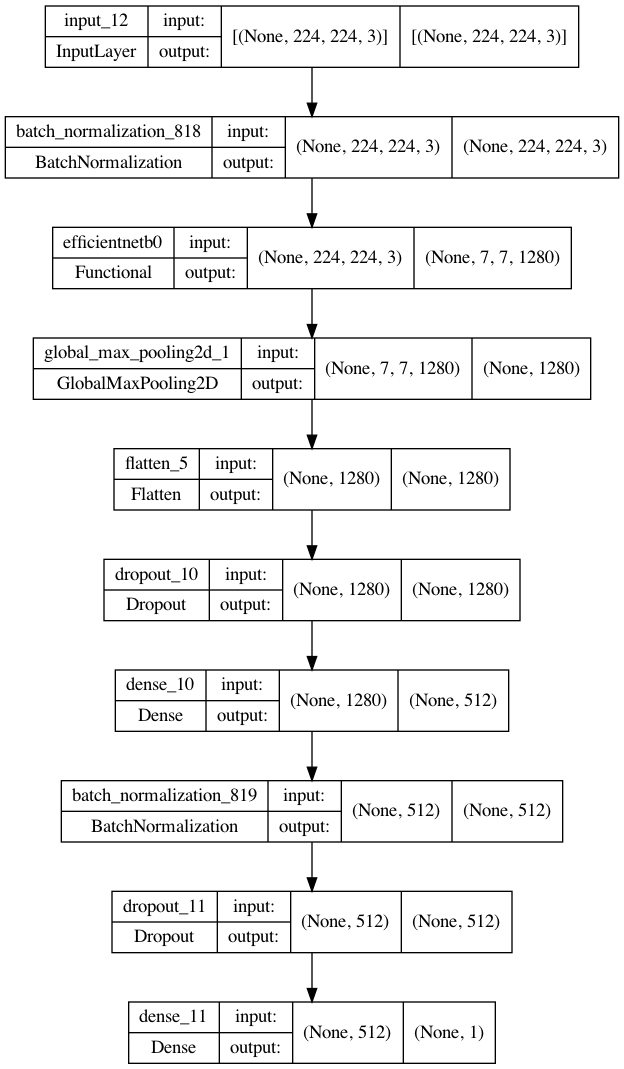

In [108]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Train the Model

# Verify the metrics in Test data

In [ ]:
model.evaluate(test_ds)

In [ ]:
pred = model.predict(test_ds)

In [ ]:
#train_ds.class_names

In [ ]:
pred

# Save the model for later use

In [ ]:
model_file = os.path.join(ROOT_PATH,DATA_SET + "_model_v1")
model.save(model_file)


In [ ]:
#reconstructed_model = keras.models.load_model(model_file)
#reconstructed_model.evaluate(test_ds)

# How the model was trained :

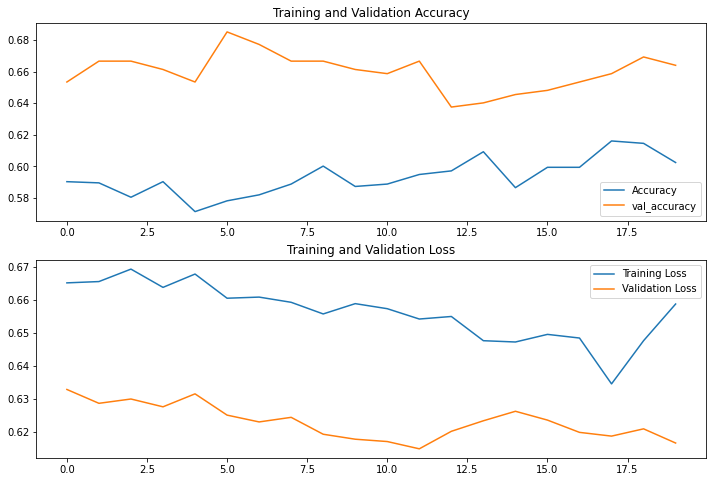

In [54]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Accuracy')
plt.plot(epochs_range, val_acc, label='val_accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [ ]:
print(hist.history)